In [1]:
%pip install -U git+https://github.com/rinnakk/japanese-clip.git > /dev/null

  Running command git clone -q https://github.com/rinnakk/japanese-clip.git /tmp/pip-req-build-xhdvmzau


In [2]:
import torch
import japanese_clip as ja_clip

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [4]:
ja_clip.available_models()

['rinna/japanese-clip-vit-b-16', 'rinna/japanese-cloob-vit-b-16']

In [5]:
%mkdir -p ./data
!wget https://github.com/rinnakk/japanese-clip/raw/master/data/dog.jpeg -P ./data

--2022-06-26 11:41:33--  https://github.com/rinnakk/japanese-clip/raw/master/data/dog.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rinnakk/japanese-clip/master/data/dog.jpeg [following]
--2022-06-26 11:41:33--  https://raw.githubusercontent.com/rinnakk/japanese-clip/master/data/dog.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377309 (368K) [image/jpeg]
Saving to: ‘./data/dog.jpeg’

dog.jpeg            100%[===================>] 368.47K  --.-KB/s    in 0.03s   

2022-06-26 11:41:34 (10.8 MB/s) - ‘./data/dog.jpeg’ saved [377309/377309]



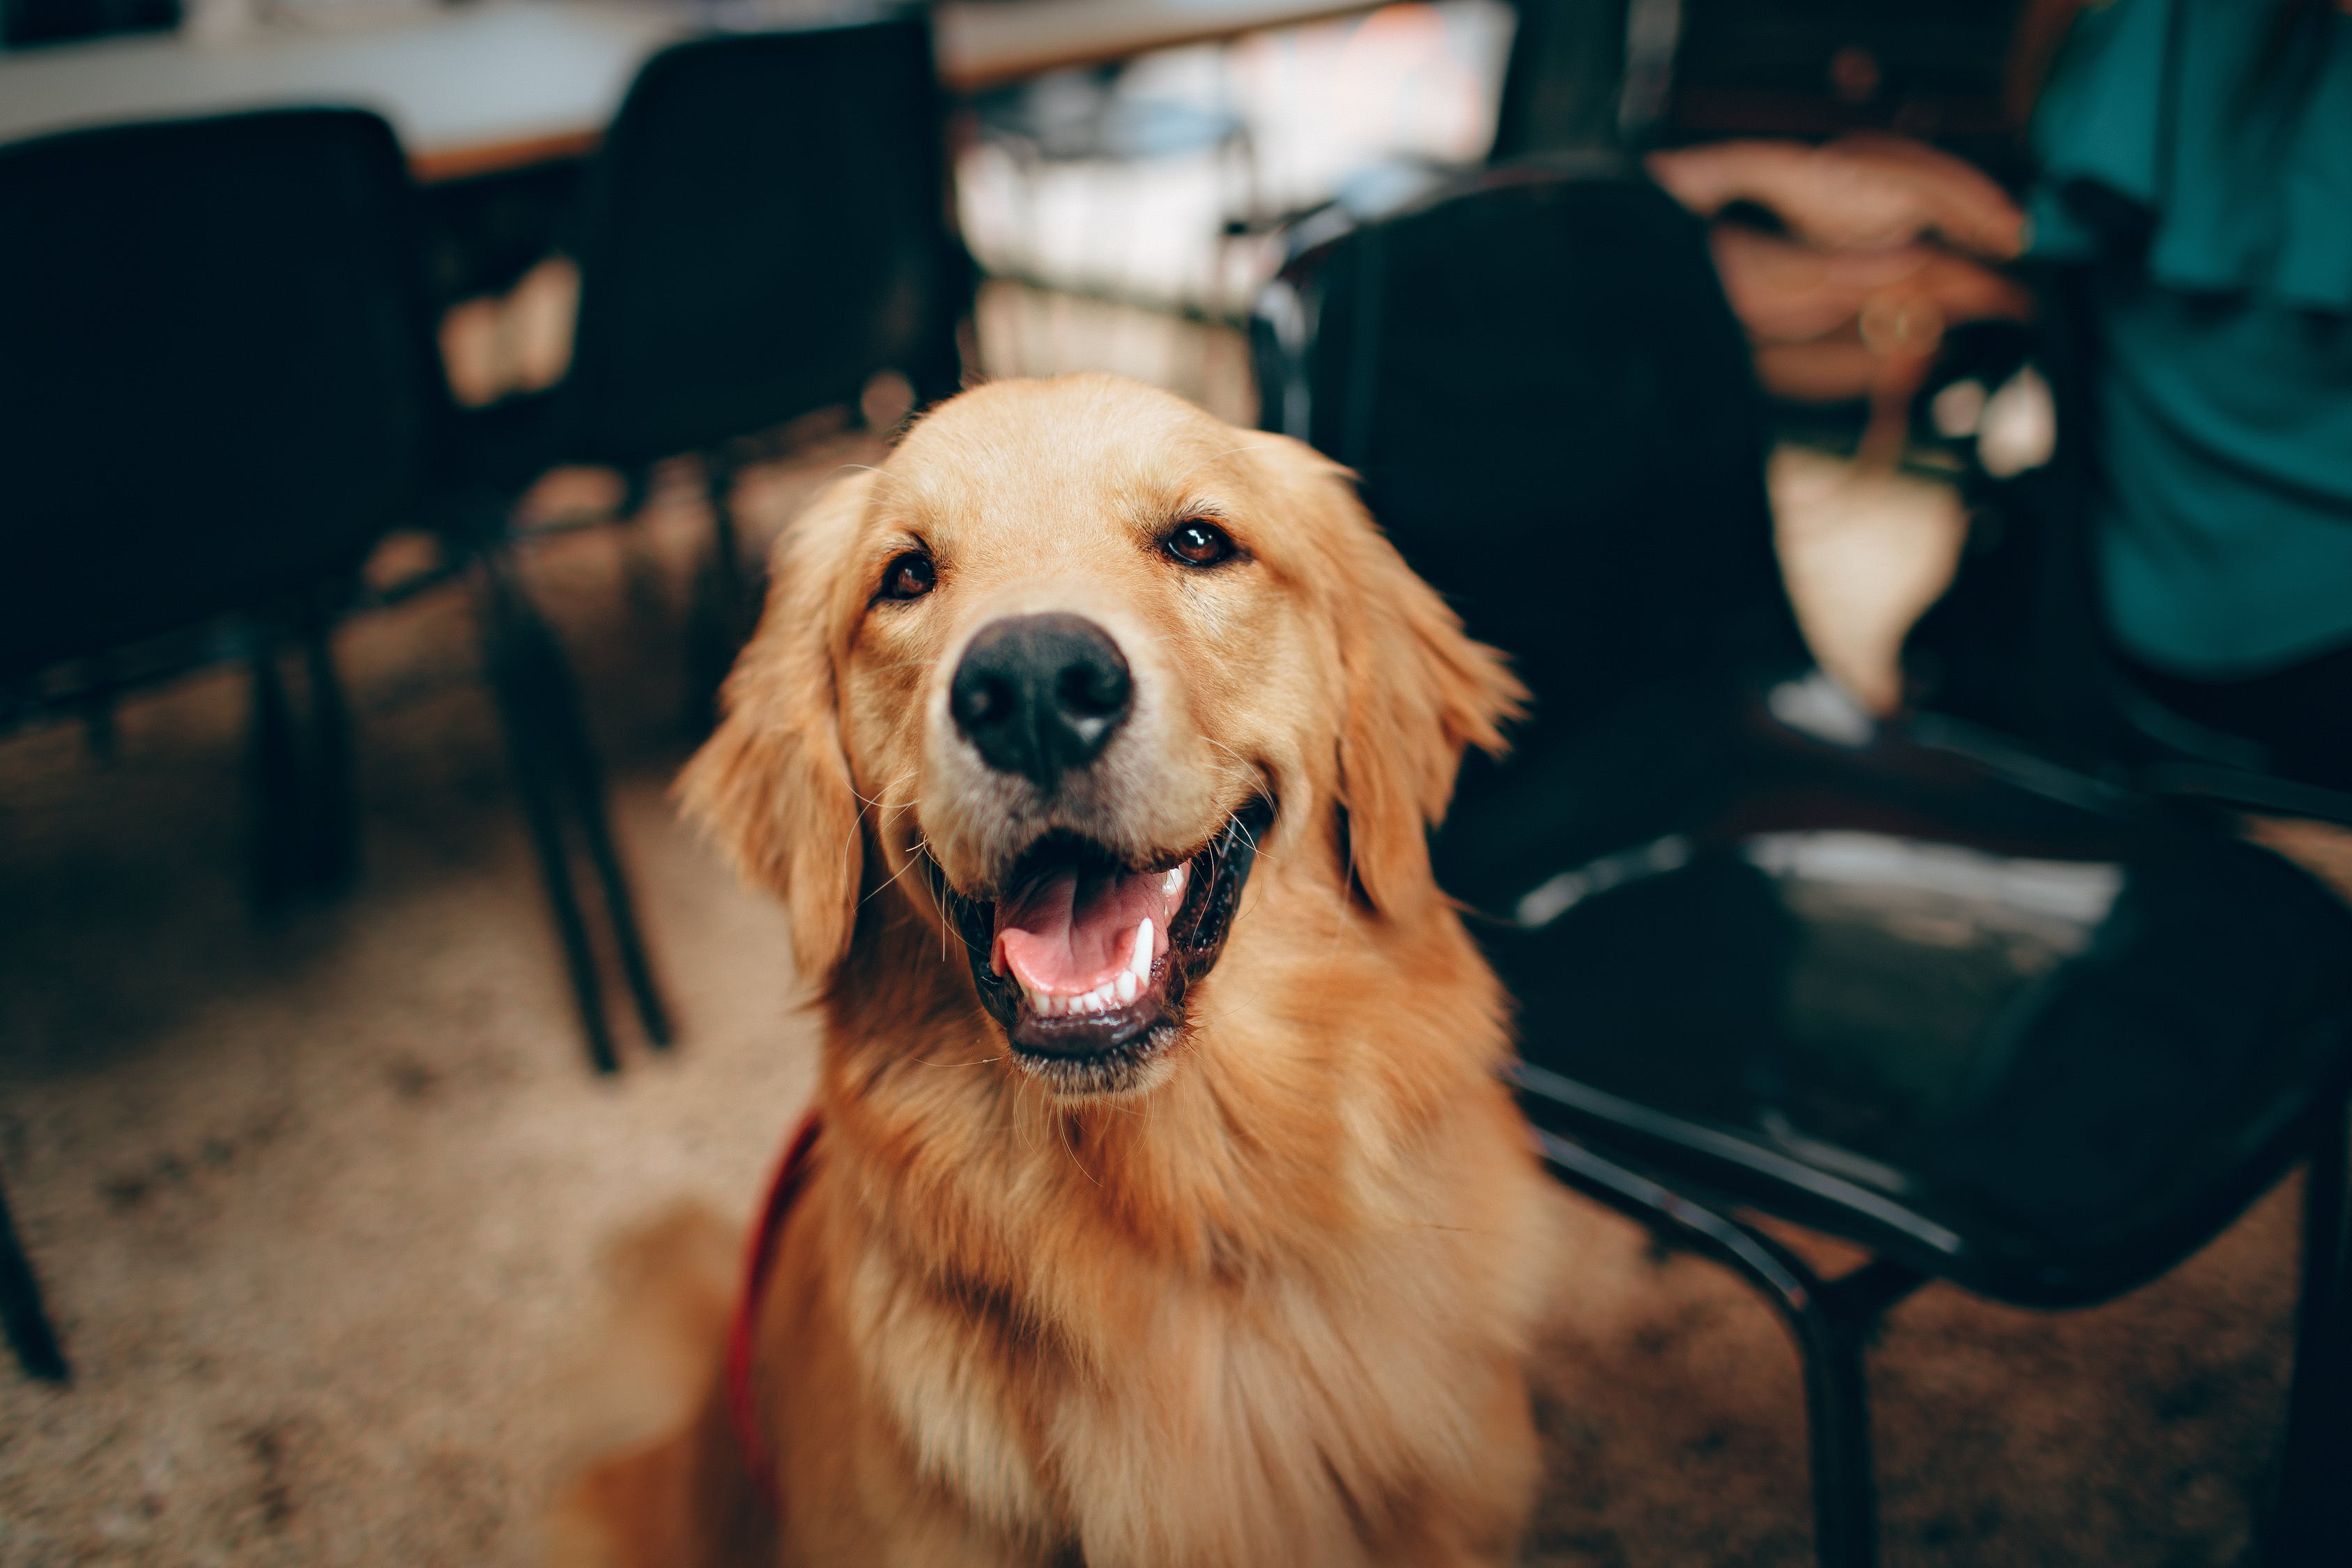

In [6]:
from IPython.display import Image
Image("./data/dog.jpeg", width=320, height=240)

In [7]:
from PIL import Image

model, preprocess = ja_clip.load("rinna/japanese-clip-vit-b-16", cache_dir="/tmp/japanese_clip", device=device)
tokenizer = ja_clip.load_tokenizer()

image = preprocess(Image.open("./data/dog.jpeg")).unsqueeze(0).to(device)
encodings = ja_clip.tokenize(
    texts=["猫", "犬", "象"],
    max_seq_len=77,
    device=device,
    tokenizer=tokenizer, # this is optional. if you don't pass, load tokenizer each time
)

with torch.no_grad():
    image_features = model.get_image_features(image)
    text_features = model.get_text_features(**encodings)
    
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)

Downloading:   0%|          | 0.00/75.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/750M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/787k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/153 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/259 [00:00<?, ?B/s]

Label probs: tensor([[0., 1., 0.]])


In [8]:
%mkdir -p ./data
!wget https://www.mlit.go.jp/road/sign/sign/img/hyo_keikoku.jpg -P ./data

--2022-06-26 11:41:58--  https://www.mlit.go.jp/road/sign/sign/img/hyo_keikoku.jpg
Resolving www.mlit.go.jp (www.mlit.go.jp)... 210.248.150.33
Connecting to www.mlit.go.jp (www.mlit.go.jp)|210.248.150.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62924 (61K) [image/jpeg]
Saving to: ‘./data/hyo_keikoku.jpg’

hyo_keikoku.jpg     100%[===================>]  61.45K   198KB/s    in 0.3s    

2022-06-26 11:42:00 (198 KB/s) - ‘./data/hyo_keikoku.jpg’ saved [62924/62924]



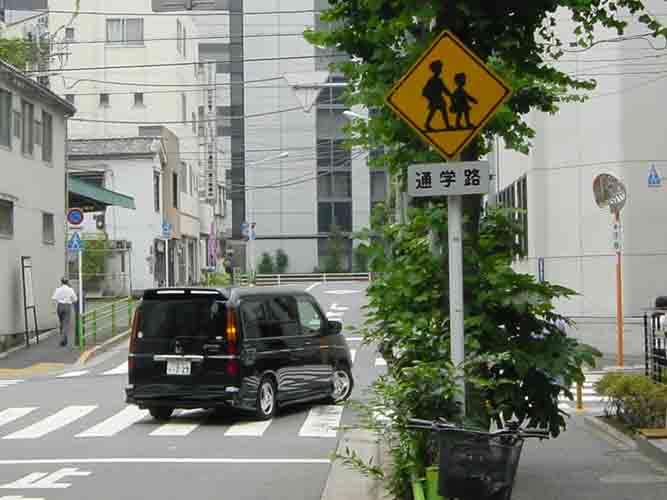

In [9]:
from IPython.display import Image
Image("./data/hyo_keikoku.jpg", width=320, height=240)

In [14]:
from PIL import Image

model, preprocess = ja_clip.load("rinna/japanese-clip-vit-b-16", cache_dir="/tmp/japanese_clip", device=device)
tokenizer = ja_clip.load_tokenizer()

image = preprocess(Image.open("./data/hyo_keikoku.jpg")).unsqueeze(0).to(device)
encodings = ja_clip.tokenize(
    texts=["自動車", "標識", "横断歩道",],
    max_seq_len=77,
    device=device,
    tokenizer=tokenizer, # this is optional. if you don't pass, load tokenizer each time
)

with torch.no_grad():
    image_features = model.get_image_features(image)
    text_features = model.get_text_features(**encodings)
    
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)

Label probs: tensor([[0., 0., 1.]])


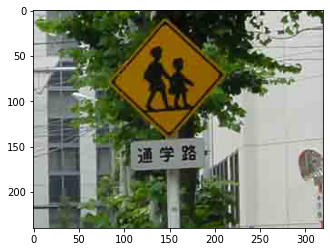

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("./data/hyo_keikoku.jpg")
im = im.crop((300, 20, 620, 260))
plt.imshow(im)

In [16]:
from PIL import Image

model, preprocess = ja_clip.load("rinna/japanese-clip-vit-b-16", cache_dir="/tmp/japanese_clip", device=device)
tokenizer = ja_clip.load_tokenizer()

image = preprocess(im).unsqueeze(0).to(device)
encodings = ja_clip.tokenize(
    texts=["自動車", "標識", "横断歩道",],
    max_seq_len=77,
    device=device,
    tokenizer=tokenizer, # this is optional. if you don't pass, load tokenizer each time
)

with torch.no_grad():
    image_features = model.get_image_features(image)
    text_features = model.get_text_features(**encodings)
    
    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)

Label probs: tensor([[0., 1., 0.]])
